# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [25]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
x_feats = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = pd.get_dummies(df[x_feats])
y = df.target
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
#normalize the data
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

In [28]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


## 2. Create a standard logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
model_log

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## 3. Write a function to calculate the precision

In [30]:
def precision(y_hat, y):
    tp_count = 0
    fp_count = 0
    y_results = list(zip(y_hat, y))
    for result in y_results:
        if result[0] == 1 and result[1] == 1:
            tp_count += 1
        elif result[0] == 1 and result[1] == 0:
            fp_count += 1
    return tp_count / (tp_count + fp_count)

## 4. Write a function to calculate the recall

In [31]:
def recall(y_hat, y):
    tp_count = 0
    fn_count = 0
    y_results = list(zip(y_hat, y))
    for result in y_results:
        if result[0] == 1 and result[1] == 1:
            tp_count += 1
        elif result[0] == 0 and result[1] == 1:
            fn_count += 1
    return tp_count / (tp_count + fn_count)

## 5. Write a function to calculate the accuracy

In [32]:
def accuracy(y_hat, y):
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0
    y_results = list(zip(y_hat, y))
    for result in y_results:
        if result[0] == 1 and result[1] == 1:
            tp_count += 1
        elif result[0] == 0 and result[1] == 0:
            tn_count += 1
        elif result[0] == 1 and result[1] == 0:
            fp_count += 1
        elif result[0] == 0 and result[1] == 1:
            fn_count += 1
    return (tp_count + tn_count) / (tp_count + tn_count + fp_count + fn_count)

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [33]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [10]:
# precision, recall and accuracy for train

precision = precision(y_hat_train, y_train)
recall = recall(y_hat_train, y_train)
accuracy = accuracy(y_hat_train, y_train)

print(precision, recall, accuracy)

0.8695652173913043 0.9022556390977443 0.871900826446281


In [22]:
precision = precision(y_hat_test, y_test)
recall = recall(y_hat_test, y_test)
accuracy = accuracy(y_hat_test, y_test)

print(precision, recall, accuracy)

0.8709677419354839 0.84375 0.8524590163934426


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [23]:
import  matplotlib.pyplot as plt
%matplotlib inline

In [37]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= None) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
# 6 lines of code here

X_train

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
278,0.604167,0.0,0.333333,0.396226,0.440639,1.0,0.0,0.618321,0.0,0.000000,1.0,0.50,0.666667
208,0.416667,1.0,0.666667,0.245283,0.141553,0.0,0.5,0.519084,0.0,0.322581,0.5,0.75,1.000000
159,0.562500,1.0,0.333333,0.339623,0.216895,0.0,0.0,0.702290,0.0,0.000000,1.0,0.00,1.000000
190,0.458333,0.0,0.000000,0.339623,0.408676,0.0,0.5,0.541985,1.0,0.193548,0.5,0.00,1.000000
226,0.687500,1.0,0.333333,0.245283,0.353881,0.0,0.0,0.244275,0.0,0.225806,0.5,0.25,1.000000
151,0.875000,0.0,0.000000,0.169811,0.052511,0.0,0.5,0.412214,0.0,0.258065,0.5,0.00,0.666667
85,0.791667,0.0,0.666667,0.198113,1.000000,0.0,0.0,0.679389,0.0,0.258065,0.5,0.00,1.000000
234,0.854167,1.0,0.000000,0.339623,0.447489,0.0,0.0,0.290076,0.0,0.387097,0.5,0.75,0.666667
122,0.250000,0.0,0.666667,0.169811,0.324201,0.0,0.0,0.770992,1.0,0.000000,1.0,0.00,0.666667
93,0.520833,0.0,0.333333,0.358491,0.369863,1.0,0.0,0.671756,1.0,0.000000,1.0,0.25,0.666667


Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

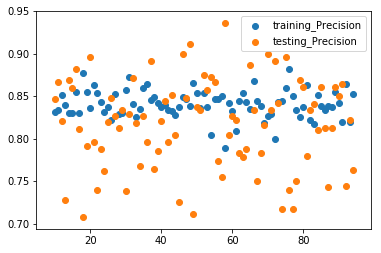

In [89]:
# code for test and train precision

plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend()

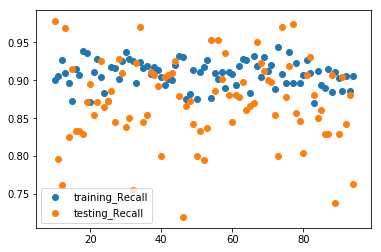

In [90]:
# code for test and train recall


plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

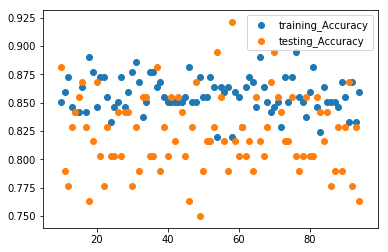

In [91]:
# code for test and train accuracy


plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.